# meap analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qgrid as qgrid
qgrid.nbinstall()

In [2]:
# consts for column names
score_code_col = 'DistrictCode'
staff_code_col = 'DCODE'
subject_col = 'Subject Name'
grade_col = 'Grade'
subgroup_col = 'Subgroup'
num_students_col = 'Number Tested'
proficient_col = 'Percent Proficient'
avg_score_col = 'Average Scaled Score'
stddev_col = 'Standard Deviation'
num_teachers_col = 'TEACHER'
num_librarians_col = 'LIB_SPEC'
num_library_support_col = 'LIB_SUPP'

In [3]:
# load stuff
scores = pd.read_csv('csv/12-13.csv')
staff = pd.read_csv('csv/librarians-per-district.csv')

# combine and drop unused
combined = pd.merge(scores, staff, left_on=score_code_col, right_on=staff_code_col)
combined.drop(staff_code_col, 1, inplace=True)
combined.drop('DNAME', 1, inplace=True)
combined.drop('BuildingCode', 1, inplace=True)

In [4]:
# remove rows for which there are too few students to report scores
combined = combined[combined[num_students_col]!='< 10']

# removing '< 10' should only leave numbers in score columns
# we can convert these columns directly to floats to support numerical ops
combined = combined.convert_objects(convert_numeric=True)

In [5]:
# look at scores on district level only
combined = combined[combined['BuildingName']=='All Buildings']
combined.drop('BuildingName', 1, inplace=True)

In [6]:
# replace NAN librarian cells with 0
combined.loc[:, num_teachers_col].fillna(0, inplace=True)
combined.loc[:, num_librarians_col].fillna(0, inplace=True)
combined.loc[:, num_library_support_col].fillna(0, inplace=True)

# print list of columns
combined.columns

Index(['SchoolYear', 'ISDCode', 'ISDName', 'DistrictCode', 'DistrictName',
       'Grade', 'Subject Name', 'Subgroup', 'Number Tested',
       'Level 1 Proficient', 'Level 2 Proficient', 'Level 3 Proficient',
       'Level 4 Proficient', 'Percent Proficient', 'Average Scaled Score',
       'Standard Deviation', 'TEACHER', 'INST_AID', 'INST_SUP', 'GUIDANCE',
       'LIB_SPEC', 'LIB_SUPP', 'LEA_ADM', 'LEA_SUPP', 'SCH_ADM', 'SCH_SUPP',
       'STU_SUPP', 'OTH_SUPP', 'SE_INSTR', 'SE_SUBJ', 'SE_CONS', 'SE_AID',
       'SE_SUPP', 'SE_OTH', 'CT_TEACH', 'CONS', 'LEA_DIR', 'COORD', 'SUPERVSR',
       'SCH_DIR'],
      dtype='object')

In [7]:
# print valid grades + subjects
# look at both together, as not all subjects are tested at each grade level
combined.groupby([grade_col, subject_col], sort=True).groups.keys()

dict_keys([(8, 'Science'), (6, 'Social Studies'), (6, 'Reading'), (5, 'Reading'), (5, 'Science'), (4, 'Reading'), (6, 'Mathematics'), (4, 'Writing'), (7, 'Reading'), (8, 'Mathematics'), (3, 'Mathematics'), (3, 'Reading'), (5, 'Mathematics'), (7, 'Mathematics'), (9, 'Social Studies'), (4, 'Mathematics'), (7, 'Writing'), (8, 'Reading')])

In [8]:
combined.groupby(subgroup_col).groups.keys()

dict_keys(['Black, not of Hispanic origin', 'English Language Learners', 'Hispanic', 'Asian', 'White, not of Hispanic origin', 'Economically Disadvantaged', 'American Indian or Alaskan Native', 'Not Economically Disadvantaged', 'Two or More Races', 'Students with Disabilities', 'All Students', 'Male', 'Not English Language Learners', 'Native Hawaiian or Other Pacific Islander', 'Female'])

In [9]:
combined.groupby(grade_col).groups.keys()

dict_keys([3, 4, 5, 6, 7, 8, 9])

In [20]:
# compare scores only within a single grade + subject combination
grouped = combined.groupby([grade_col, subject_col, subgroup_col])

data = grouped.get_group((8, 'Reading', 'All Students'))
data = data.drop(grade_col, 1).drop(subject_col, 1).drop(subgroup_col, 1)

In [21]:
detroit = data[data[num_teachers_col]==2323.7]
detroit[num_students_col] / detroit[num_librarians_col]

337566    1566
dtype: float64

In [22]:
# one school only has CT_TEACH (career teachers)
data[data[num_teachers_col]==0]

,SchoolYear,ISDCode,ISDName,DistrictCode,DistrictName,Number Tested,Level 1 Proficient,Level 2 Proficient,Level 3 Proficient,Level 4 Proficient,...,SE_CONS,SE_AID,SE_SUPP,SE_OTH,CT_TEACH,CONS,LEA_DIR,COORD,SUPERVSR,SCH_DIR
176873,12 - 13 School Year,50,Macomb ISD,50000,Macomb ISD,14,0,21.4,64.3,14.3,...,48,239,76.5,17,NaN,NaN,6,NaN,NaN,NaN


In [23]:
desc_data = data[[num_students_col, proficient_col, avg_score_col, 
                  stddev_col, num_teachers_col, num_librarians_col, num_library_support_col]]
desc_data.describe()

,Number Tested,Percent Proficient,Average Scaled Score,Standard Deviation,TEACHER,LIB_SPEC,LIB_SUPP
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,160.759019,62.277778,825.996349,23.131515,99.691905,0.798788,0.764012
std,237.327433,15.218558,9.062744,2.994371,152.289482,2.315006,2.008205
min,10.000000,0.000000,785.670000,11.480000,0.000000,0.000000,0.000000
25%,47.000000,54.200000,821.280000,21.350000,30.510000,0.000000,0.000000
50%,88.000000,64.500000,826.990000,23.150000,55.670000,0.000000,0.000000
75%,183.000000,72.600000,831.340000,24.990000,111.560000,1.000000,0.500000
max,3132.000000,100.000000,850.670000,40.890000,2323.700000,25.700000,15.390000


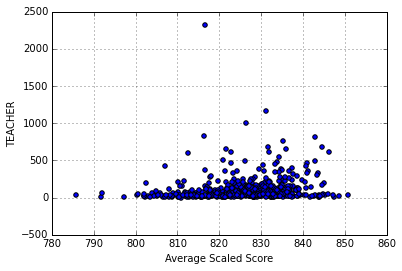

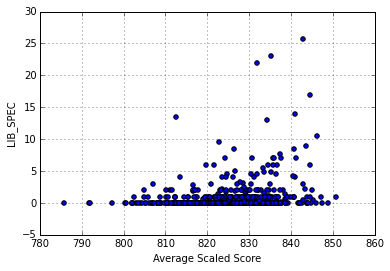

In [24]:
data.plot(x=avg_score_col, y=num_teachers_col, kind='scatter')
data.plot(x=avg_score_col, y=num_librarians_col, kind='scatter')

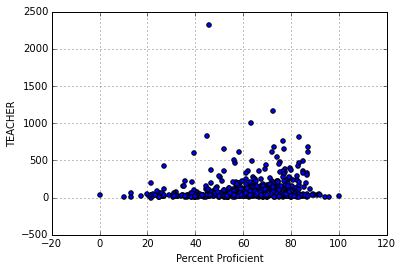

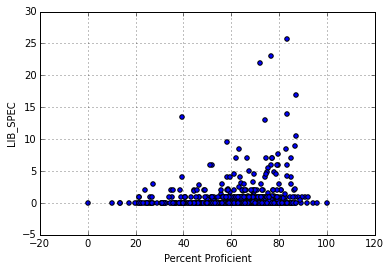

In [25]:
data.plot(x=proficient_col, y=num_teachers_col, kind='scatter')
data.plot(x=proficient_col, y=num_librarians_col, kind='scatter')

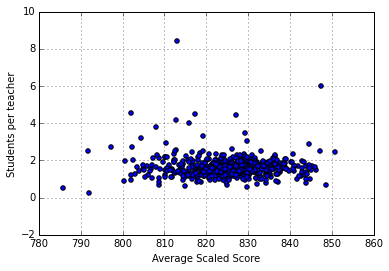

In [26]:
students_per_teacher_col = 'Students per teacher'
data.loc[:,students_per_teacher_col] = data[num_students_col].values / data[num_teachers_col].values
data.plot(x=avg_score_col, y=students_per_teacher_col, kind='scatter')

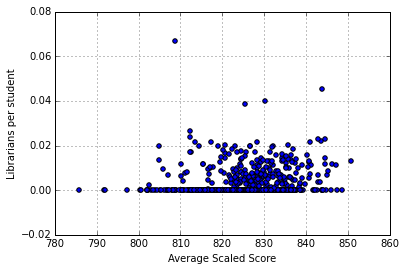

In [27]:
# since many districts have no librarians and dividing by zero is out
# use librarians / student instead of students / librarian
librarian_per_student_col = 'Librarians per student'
data.loc[:,librarian_per_student_col] = data[num_librarians_col].values / data[num_students_col].values
data.plot(x=avg_score_col, y=librarian_per_student_col, kind='scatter')

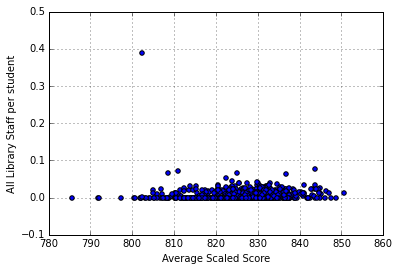

In [31]:
all_library_per_student_col = 'All Library Staff per student'
data.loc[:,all_library_per_student_col] = (data[num_librarians_col].values + data[num_library_support_col].values) / data[num_students_col].values
data.plot(x=avg_score_col, y=all_library_per_student_col, kind='scatter')